In [18]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

# STEP 4: Test it
!kaggle datasets list | head -5


ref                                                            title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset   Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          11468        406  1.0              
jaderz/hospital-beds-management                                Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           9472        238  1.0              
jockeroika/life-style-data                                     Life Style Data                                       3995645  2025-10-14 13:50:45.303000          13471        296  0.8235294        


In [19]:
!kaggle datasets download shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 92% 722M/788M [00:06<00:01, 57.8MB/s]
100% 788M/788M [00:06<00:00, 120MB/s] 


In [20]:
!unzip microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [21]:
from PIL import Image

In [24]:
img = Image.open('/content/PetImages/Dog/1.jpg')

In [37]:
img.height

500

In [65]:
import os
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt
datagen = tf.keras.preprocessing.image.ImageDataGenerator

In [66]:
cat_dir = '/content/PetImages/Cat'
dog_dir = '/content/PetImages/Dog'

In [67]:
len(os.listdir(cat_dir)) ,len(os.listdir(dog_dir))


(11742, 11670)

In [68]:
import cv2

In [69]:
cv2.imread('/content/PetImages/Cat/2.jpg').shape

(397, 312, 3)

# Building the model

In [70]:
train_datagen = datagen(rescale=1./255, validation_split = 0.2)

In [71]:
 train_datagenerator = train_datagen.flow_from_directory(
     '/content/PetImages',
     target_size = (150,150),
     batch_size = 32,
     class_mode = 'binary',
     subset = 'training'
 )

Found 18729 images belonging to 2 classes.


In [72]:
valid_datagenerator = train_datagen.flow_from_directory(
     '/content/PetImages',
     target_size = (150,150),
     batch_size = 32,
     class_mode = 'binary',
     subset = 'validation',
     shuffle = False

 )

Found 4681 images belonging to 2 classes.


In [73]:
train_datagenerator.class_indices

{'Cat': 0, 'Dog': 1}

In [74]:
train_datagenerator.image_shape

(150, 150, 3)

In [86]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(train_datagenerator.image_shape)),

    keras.layers.Conv2D(32, kernel_size=(3,3), use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, kernel_size=(3,3), use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, kernel_size=(3,3), use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, kernel_size=(3,3), use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),

    keras.layers.Dense(512, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(2, activation='softmax'),
])

In [87]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 148, 148, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 72, 72, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 72, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 34, 34, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 15, 15, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     3,211,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,04

 Total params: 3,456,226 (13.18 MB)

 Trainable params: 3,454,498 (13.18 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [88]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagenerator,epochs=50,validation_data=valid_datagenerator)

Epoch 1/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.6006 - loss: 0.8208 - val_accuracy: 0.5766 - val_loss: 0.7645
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7361 - loss: 0.5283 - val_accuracy: 0.6343 - val_loss: 0.7084
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.7877 - loss: 0.4546 - val_accuracy: 0.7492 - val_loss: 0.5240
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.8166 - loss: 0.4069 - val_accuracy: 0.8186 - val_loss: 0.4302
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.8385 - loss: 0.3702 - val_accuracy: 0.8496 - val_loss: 0.3506
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.8493 - loss: 0.3440 - val_accuracy: 0.8253 - val_loss: 0.4012
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 80s 69ms/step - accuracy: 0.8664 - loss: 0.3085 - val_accuracy: 0.7671 - val_loss: 0.5355
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.8741 - loss: 0.2920 - 

In [64]:
import os
from PIL import Image
from tqdm import tqdm

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("/content/PetImages", folder_name)
    for fname in tqdm(os.listdir(folder_path)):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images")

100%|██████████| 12501/12501 [00:00<00:00, 60136.27it/s]

Deleted 1590 images


Text(0.5, 0, 'epoch')

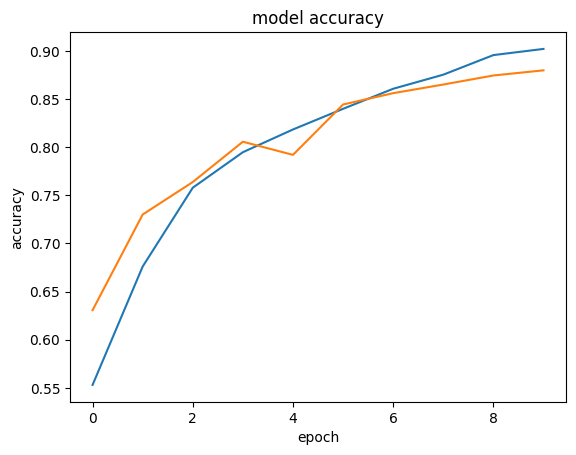

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

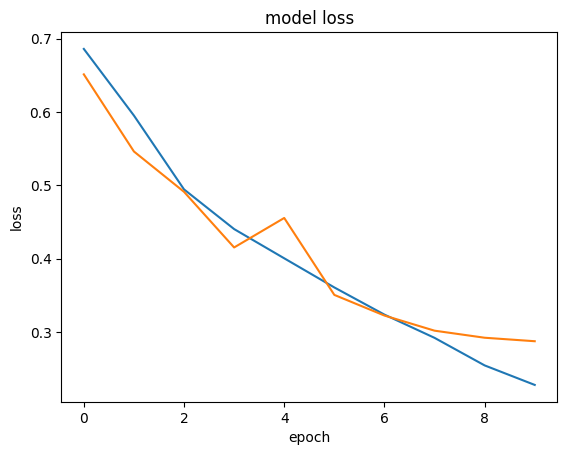

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')